<a href="https://colab.research.google.com/github/Hanief00/PCVK_GANJIL_2024/blob/main/Modul_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Nama : Hanief Mochsin
* Kelas : TI-3E
* Absen : 15
* NIM : 2241720181

# PRAKTIKUM

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
import cv2 as cv
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [4]:
def convolution2d(image, kernel, padding, strides):
    # Mendapatkan dimensi gambar dan juga kernel kernel
    image_height, image_width = image.shape
    kernel_height, kernel_width = kernel.shape

    # menghitung dimensi dari output
    output_height = int((image_height + 2 * padding - kernel_height) / strides) + 1
    output_width = int((image_width + 2 * padding - kernel_width) / strides) + 1

    # Membuat output berupa gambar kosong
    output_image = np.zeros((output_height, output_width))

    # Mengatur padding dari gambar
    padded_image = np.pad(image, padding, mode='constant')

    # Operasi Konvolusi
    for i in range(0, output_height):
        for j in range(0, output_width):
            for k in range(0, kernel_height):
                for l in range(0, kernel_width):
                    output_image[i, j] += padded_image[i * strides + k, j * strides + l] * kernel[k, l]

    # Mengembalikan output dari image
    return output_image

In [19]:
import os
file_path = '/content/drive/MyDrive/Semester 5/Pengolahan Citra dan Visi Komputer/Modul_3/female.tiff'

img = cv.imread(file_path)

if img is None:
  raise IOError("Gagal memuat gambar. mohon koreksi lokasi gambar.")

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

kernel_sharpen = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
kernel_emboss = np.array([[-2,-1,0],[-1,1,1],[0,1,2]])
kernel_left_sobel = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
kernel_canny_edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
kernel_prewitt_edge = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])
kernel_gaussian_5x5 = np.array([[1, 4, 6, 4, 1],[4, 16, 24, 16, 4],[6, 24, 36, 24, 6],[4, 16, 24, 16, 4],[1, 4, 6, 4, 1]])/256

# 21x21 Gaussian Blur
kernel_size = 21
sigma = math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

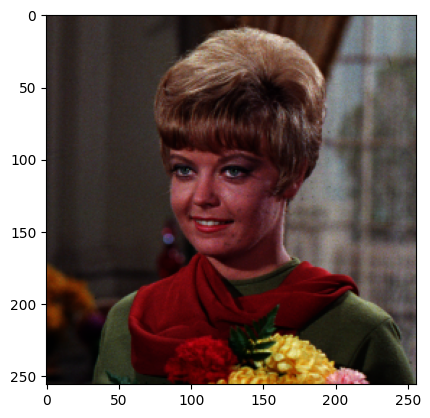

Kernel_Sharpen


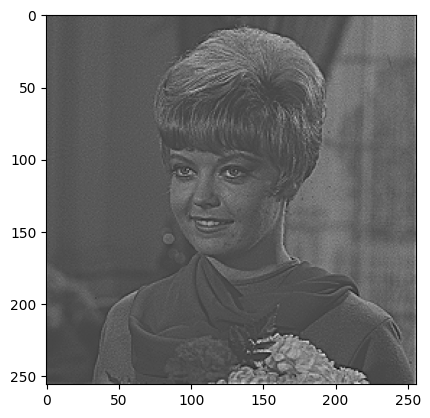


Kernel_Emboss


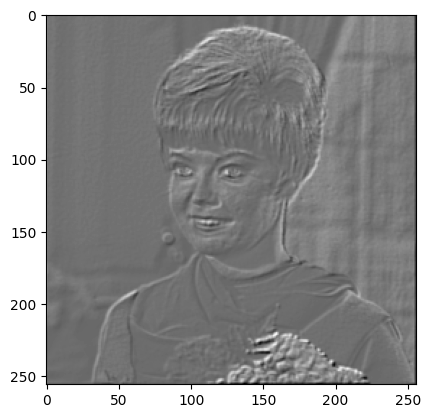


Kernel_Left_Sobel


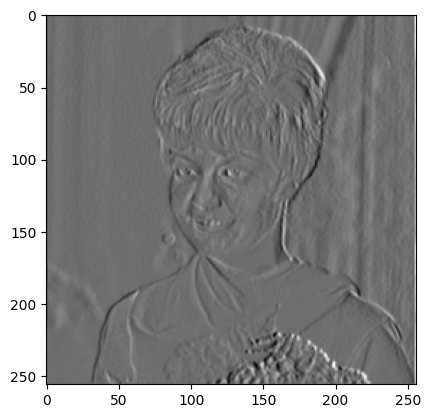


Kernel_Canny_Edge


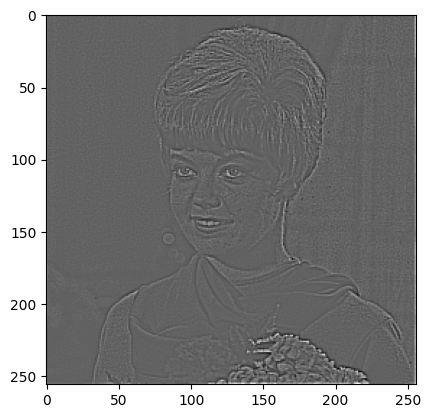


Kernel_Prewitt_Edge


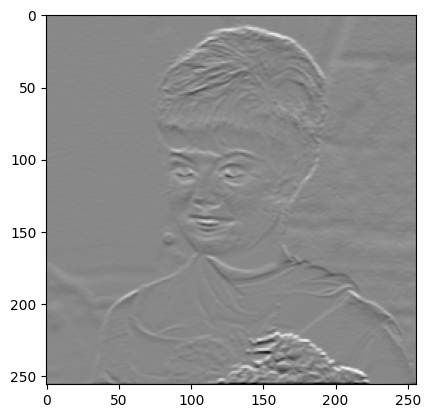


Kernel_Gaussian_Blur_5x5


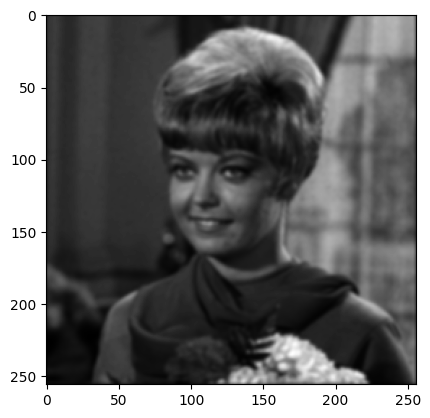


Kernel_Gaussian_Blur_21x21


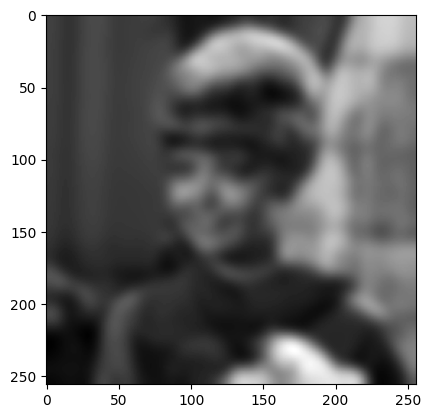

In [22]:
# Tampilkan gambar asli
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()

# Tampilkan hasil konvolusi dengan kernel yang berbeda
print("Kernel_Sharpen : ")
plt.imshow(convolution2d(img_gray, kernel_sharpen, 1, 1), cmap='gray')
plt.show()
print("")
print("Kernel_Emboss : ")
plt.imshow(convolution2d(img_gray, kernel_emboss, 1, 1), cmap='gray')
plt.show()
print("")
print("Kernel_Left_Sobel : ")
plt.imshow(convolution2d(img_gray, kernel_left_sobel, 1, 1), cmap='gray')
plt.show()
print("")
print("Kernel_Canny_Edge : ")
plt.imshow(convolution2d(img_gray, kernel_canny_edge, 1, 1), cmap='gray')
plt.show()
print("")
print("Kernel_Prewitt_Edge : ")
plt.imshow(convolution2d(img_gray, kernel_prewitt_edge, 1, 1), cmap='gray')
plt.show()
print("")
print("Kernel_Gaussian_Blur_5x5 : ")
plt.imshow(convolution2d(img_gray, kernel_gaussian_5x5, 2, 1), cmap='gray')
plt.show()
print("")
print("Kernel_Gaussian_Blur_21x21 : ")
plt.imshow(cv.filter2D(img_gray, -1, gauss_kernel), cmap='gray')
plt.show()
print("")

# TUGAS

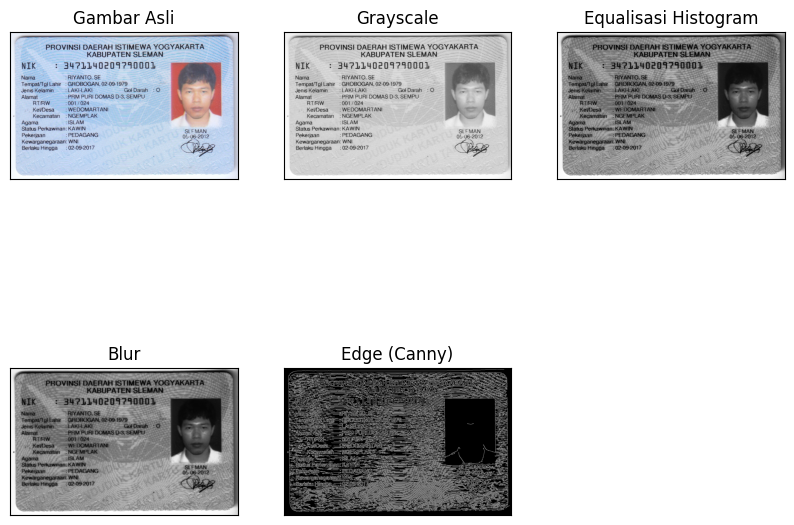

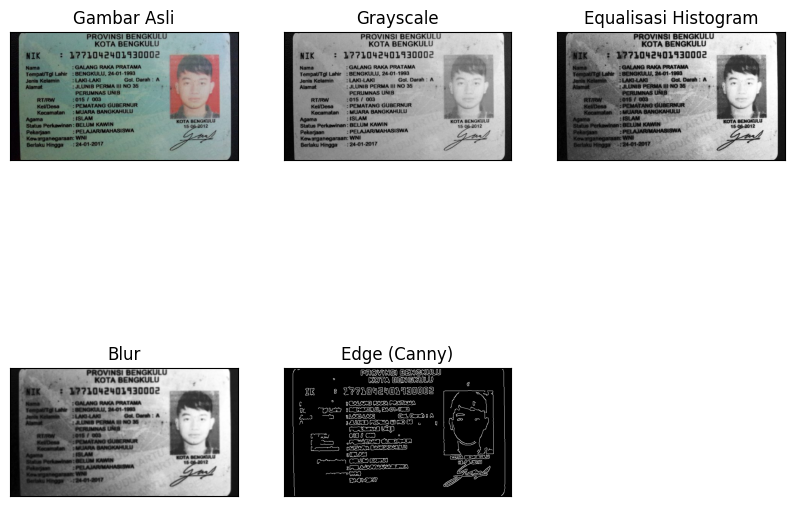

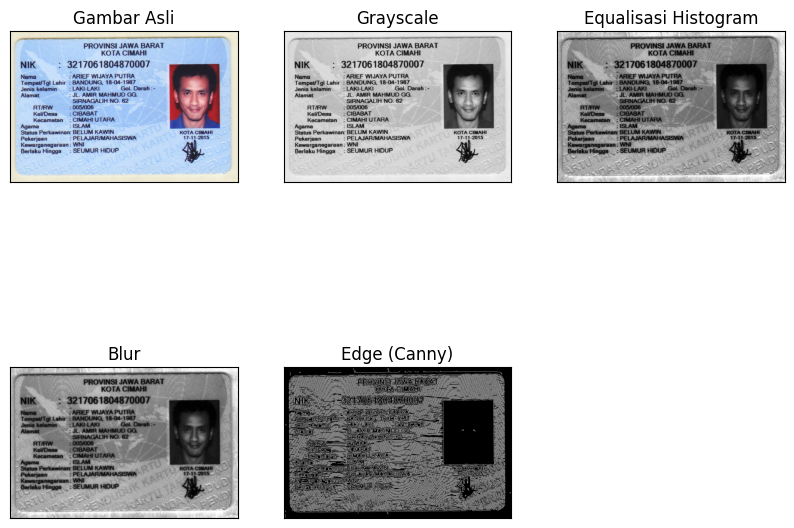

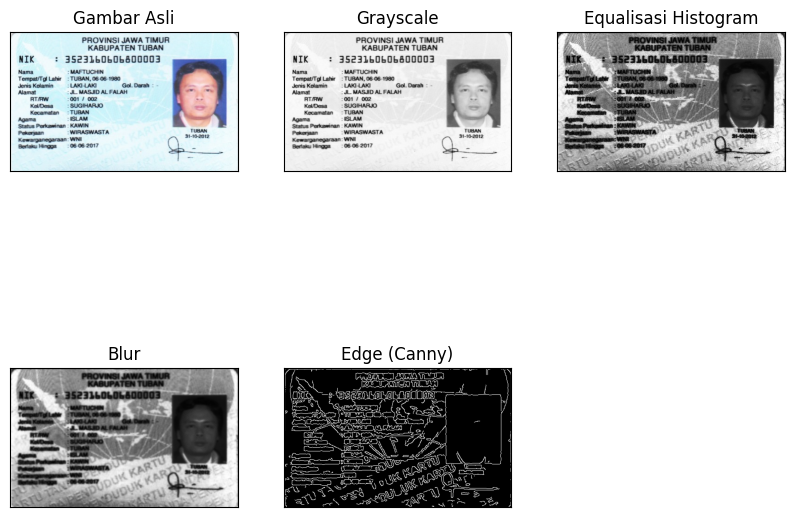

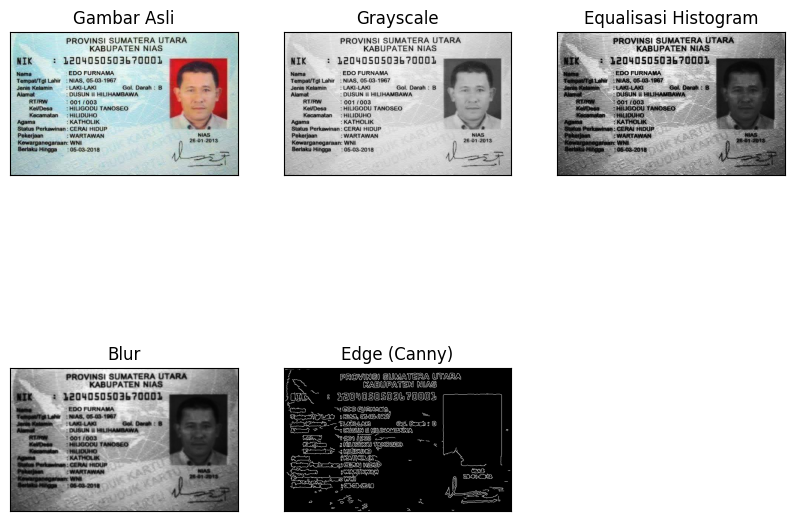

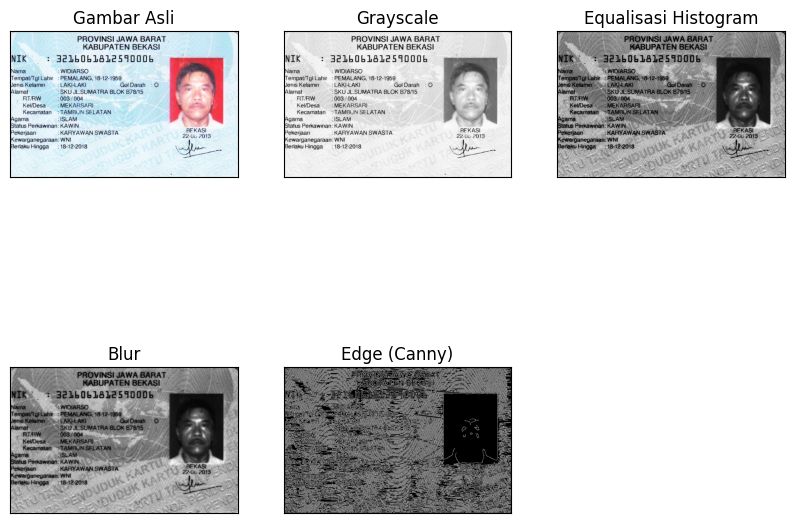

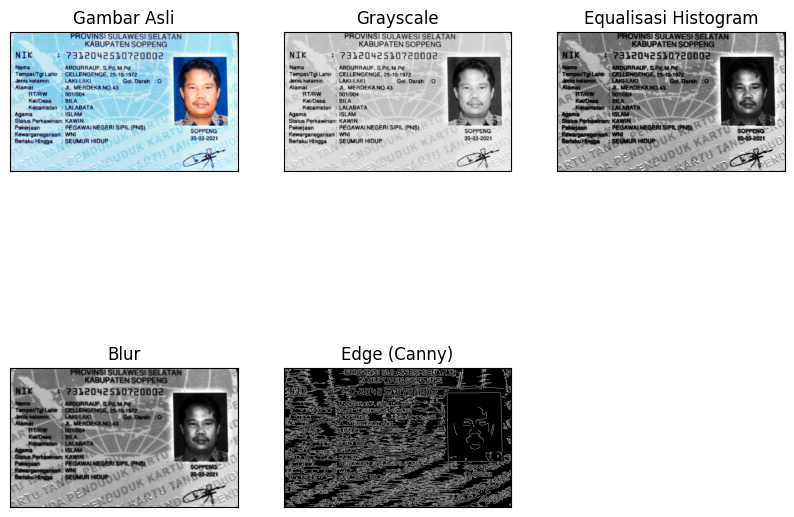

In [15]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Memuat gambar-gambar
daftar_gambar = ['ktp.png', 'ktp1.png', 'ktp2.png', 'ktp4.png', 'ktp5.png', 'ktp6.png', 'KTP7.jpeg']

# Iterasi melalui setiap path gambar dan proses setiap gambar
for path_gambar in daftar_gambar:
    gambar = cv2.imread(path_gambar)  # Memuat gambar menggunakan path saat ini

    # Cek apakah gambar berhasil dimuat
    if gambar is None:
        print(f"Error: Tidak dapat memuat gambar dari path: {path_gambar}")
        continue  # Lewati gambar ini jika pemuatan gagal

    # Langkah 1: Konversi gambar menjadi grayscale (abu-abu)
    gambar_abu_abu = cv2.cvtColor(gambar, cv2.COLOR_BGR2GRAY)

    # Langkah 2: Terapkan histogram equalization untuk meningkatkan kontras
    gambar_equalisasi = cv2.equalizeHist(gambar_abu_abu)

    # Langkah 3: Terapkan Gaussian blur untuk mengurangi noise
    gambar_blur = cv2.GaussianBlur(gambar_equalisasi, (5, 5), 0)

    # Langkah 4: Terapkan Deteksi Tepi (Canny Edge Detection)
    tepi = cv2.Canny(gambar_blur, 100, 200)

    # Tampilkan hasil menggunakan matplotlib
    judul = ['Gambar Asli', 'Grayscale', 'Equalisasi Histogram', 'Blur', 'Edge (Canny)']
    gambar_hasil = [gambar, gambar_abu_abu, gambar_equalisasi, gambar_blur, tepi]

    plt.figure(figsize=(10, 8))

    for i in range(5):
        plt.subplot(2, 3, i + 1)
        if i == 0:
            plt.imshow(cv2.cvtColor(gambar_hasil[i], cv2.COLOR_BGR2RGB))  # Konversi ke RGB untuk tampilan plt
        else:
            plt.imshow(gambar_hasil[i], cmap='gray')
        plt.title(judul[i])
        plt.xticks([]), plt.yticks([])  # Hilangkan sumbu x dan y untuk kejelasan

    plt.show()